# Project - Bank Churn Analysis - version v002

---

Now in this notebook we will develop an inferential model for the data

## First Step - Data Manipulation and Data Cleaning.

In [1]:
import pandas as pds

UserPath = r"/content/drive/"
FilePath = r"MyDrive/Dados/"
FileName = r"bankchurndata.csv"

In [2]:
BankData = pds.read_csv(f"{UserPath}{FilePath}{FileName}")
display(BankData.head()) # Data visualization.

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**Questions:**

1.   Are all variables important for the analysis?
2.   How many customers we have in our sample?
3.   Do we have some missing data in our sample?
4.   Are all variables correctly formed?

In [3]:
# We don't need the RowNumber variable.
BankData = BankData.drop(columns="RowNumber")

In [4]:
# How many customers we have in our sample?
NumCustomers = BankData['CustomerId'].nunique()
print(f"We have {NumCustomers:,} customers in our sample.")

We have 10,000 customers in our sample.


In [5]:
# Do we have some missing data in our sample?
NumMissing = BankData.isna().sum().sum()
print(f"We have {NumMissing:,} missing data in our sample.")

We have 0 missing data in our sample.


In [6]:
# Are all variables correctly formed?
print(BankData.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB
None


In [7]:
# All variables are correctly formed now.
BankData = BankData.set_index("CustomerId")
BankData["HasCrCard"] = BankData["HasCrCard"].astype(int) # Dummy Format
BankData["IsActiveMember"] = BankData["IsActiveMember"].astype(int) # Dummy Format
BankData["Exited"] = BankData["Exited"].astype('category')
print(BankData.info())

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 15634602 to 15628319
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Surname          10000 non-null  object  
 1   CreditScore      10000 non-null  int64   
 2   Geography        10000 non-null  object  
 3   Gender           10000 non-null  object  
 4   Age              10000 non-null  int64   
 5   Tenure           10000 non-null  int64   
 6   Balance          10000 non-null  float64 
 7   NumOfProducts    10000 non-null  int64   
 8   HasCrCard        10000 non-null  int64   
 9   IsActiveMember   10000 non-null  int64   
 10  EstimatedSalary  10000 non-null  float64 
 11  Exited           10000 non-null  category
dtypes: category(1), float64(2), int64(6), object(3)
memory usage: 947.4+ KB
None


## Second Step - Create an Inferential Model

### Dummy Encoding

In statistical modeling, qualitative or categorical variables often need to be transformed into a numerical format to be used effectively in the model. One of the most common methods for doing this is One-Hot Encoding, also known as Dummy Encoding. This technique converts categorical variables into a series of binary variables (0s and 1s), where each category or level of the qualitative variable is represented as a separate column.

In [8]:
# Create dummy encoding for our sample.
BankData = pds.get_dummies(
    BankData.drop(columns="Surname"),
    columns=["Geography", "Gender"],
    prefix_sep="",
    drop_first=True,
    dtype=int)

Multicollinearity occurs when two or more predictor variables in a statistical model are highly correlated, meaning they contain redundant information. In the context of dummy variables, this often arises when creating binary variables from categorical data using techniques like One-Hot Encoding. If all categories of a qualitative variable are represented by dummy variables, they can sum up to 1 for each observation. This leads to perfect multicollinearity because one dummy variable can be predicted exactly from the others.

### Dataset Balance

When building a statistical model, it's crucial to ensure that the dataset is properly balanced. A balanced sample refers to having a proportionate representation of all relevant categories or groups within the data. This balance helps in preventing biases that can distort the model's predictions or conclusions.

In [9]:
# Are our data balenced in our sample?
display(BankData["Exited"].value_counts(normalize=True))

,proportion
Exited,
0,0.7963
1,0.2037


The SMOTE (Synthetic Minority Over-sampling Technique) method is a popular data balancing technique used to address the issue of class imbalance in datasets, particularly for machine learning models. In imbalanced datasets, one class (usually the majority class) has significantly more samples than the other class (minority class), which can lead to biased model performance, where the model becomes more accurate at predicting the majority class while underperforming for the minority class.

In [10]:
from imblearn.over_sampling import SMOTE

In [11]:
# Define exogenous and endogenous variables.
ExogenousVariables = BankData.drop(columns="Exited")
EndogenousVariable = BankData["Exited"]

In [12]:
# SMOTE method for our sample.
RandomState = 171024
BankDataSmote = SMOTE(random_state=RandomState)
BankDataSmote = BankDataSmote.fit_resample(ExogenousVariables, EndogenousVariable)
BankData = pds.DataFrame(BankDataSmote[0], columns=ExogenousVariables.columns)
BankData["Exited"] = BankDataSmote[1]

### Dataset Standard Scale

StandardScaler is a feature scaling technique commonly used in data preprocessing for machine learning models. It standardizes the features by removing the mean and scaling them to unit variance. This transformation ensures that each feature in the dataset has a mean of 0 and a standard deviation of 1, which helps to bring all features onto a similar scale.

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
# Applied normalization in our sample.
Normalizarition = StandardScaler()
BankData = pds.DataFrame(
    Normalizarition.fit_transform(BankData),
    columns=BankData.columns)

### Models Development

#### Train Test Split

Train-Test Split is a fundamental technique in machine learning used to evaluate the performance of a model. It involves dividing the dataset into two separate subsets: one for training the model (the training set) and one for testing its performance (the test set). This approach allows us to assess how well the model generalizes to unseen data.

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
# Applied train test split in our sample.
TrainExogenous, TestExogenous, TrainEndogenous, TestEndogenous = train_test_split(
    BankData.drop(columns="Exited"),
    BankData["Exited"],
    test_size=0.25,
    random_state=RandomState)

#### K-Nearest Neighbors (KNN) Model

K-Nearest Neighbors (KNN) is a non-parametric, instance-based learning algorithm used for classification and regression. It works by finding the
**k** closest points (neighbors) to a new data point and makes a prediction based on the majority class (for classification) or the average value (for regression) of those neighbors.


In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
# Creat KNN model for our sample.
KNNModel = KNeighborsClassifier(metric='euclidean')
KNNModel.fit(TrainExogenous, TrainEndogenous)

KNeighborsClassifier(metric='euclidean')

In [19]:
# Make predictions with the model.
KNNPrediction = KNNModel.predict(TestExogenous)

#### Naive Bayes Probabilistic Model

The Naive Bayes probabilistic model is a simple yet powerful classification algorithm based on Bayes' theorem, particularly effective for binary and categorical data. In the context of the Bernoulli distribution, the model is tailored for datasets where each feature represents a binary variable, typically indicating the presence or absence of a characteristic.

In [20]:
from sklearn.naive_bayes import BernoulliNB

In [21]:
# Creat bernoulli naive bayes model for our sample.
NaiveBayesModel = BernoulliNB()
NaiveBayesModel.fit(TrainExogenous, TrainEndogenous)

BernoulliNB()

In [22]:
# Make predictions with the model.
NaiveBayesPrediction = NaiveBayesModel.predict(TestExogenous)

#### Logistic Regression Model for Classification

Logistic regression is a widely used statistical method for binary classification tasks. It models the relationship between one or more independent variables (features) and a dependent binary variable (the target). Unlike linear regression, which predicts continuous outcomes, logistic regression predicts the probability that a given input belongs to a particular category.

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
# Creat logistic regression model for our sample.
LogisticRegressionModel = LogisticRegression()
LogisticRegressionModel.fit(TrainExogenous, TrainEndogenous)

LogisticRegression()

In [25]:
# Make predictions with the model.
LogisticRegressionPrediction = LogisticRegressionModel.predict(TestExogenous)

#### Decision Tree Model

Decision tree models are a popular and intuitive method for both classification and regression tasks in machine learning. They work by recursively partitioning the input space into subsets based on the feature values, creating a tree-like structure where each internal node represents a decision based on an attribute, each branch represents the outcome of that decision, and each leaf node represents a final output (class label or continuous value).

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
# Creat decision tree model for our sample.
DecisionTreeModel = DecisionTreeClassifier(criterion='entropy', random_state=RandomState)
DecisionTreeModel.fit(TrainExogenous, TrainEndogenous)

DecisionTreeClassifier(criterion='entropy', random_state=171024)

In [28]:
# Make predictions with the model.
DecisionTreePrediction = DecisionTreeModel.predict(TestExogenous)

### Models Comparation

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt

#### Confusion Matrix

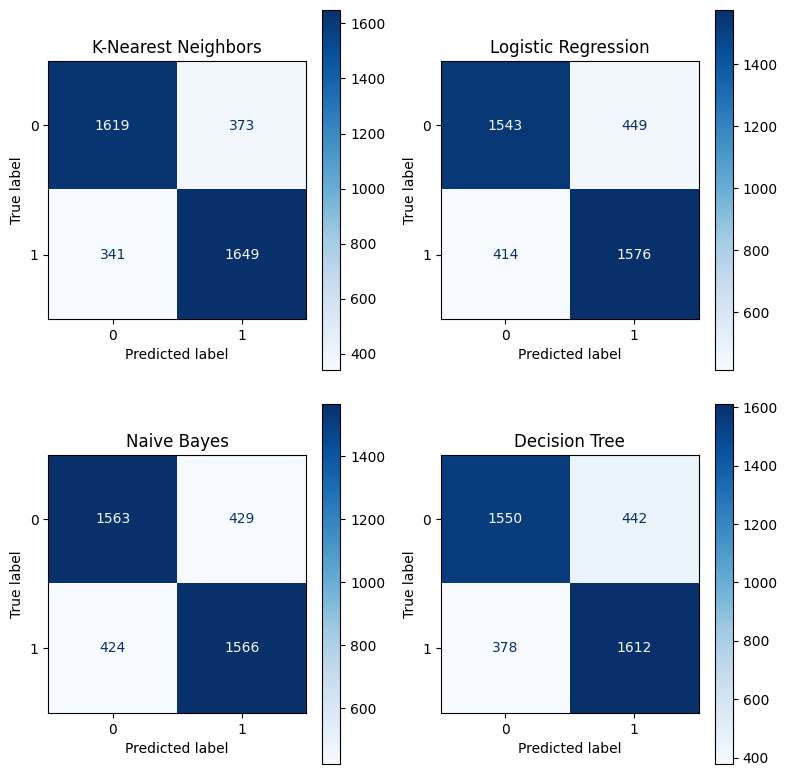

In [30]:
# Make charts to view confusion matrix of models.
fig, axes = plt.subplots(2, 2, figsize=(8, 8))
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(TestEndogenous, KNNPrediction)).plot(
    include_values=True,
    cmap='Blues',
    ax=axes[0,0])
axes[0,0].set_title("K-Nearest Neighbors")
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(TestEndogenous, NaiveBayesPrediction)).plot(
    include_values=True,
    cmap='Blues',
    ax=axes[1,0])
axes[1,0].set_title("Naive Bayes")
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(TestEndogenous, LogisticRegressionPrediction)).plot(
    include_values=True,
    cmap='Blues',
    ax=axes[0,1])
axes[0,1].set_title("Logistic Regression")
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(TestEndogenous, DecisionTreePrediction)).plot(
    include_values=True,
    cmap='Blues',
    ax=axes[1,1])
axes[1,1].set_title("Decision Tree")
plt.tight_layout()
plt.show()

#### Acurracy Score

In [31]:
# View accuracy of the models.
print(f"K-Nearest Neighbors Accuracy Score: {accuracy_score(TestEndogenous, KNNPrediction):.2%}")
print(f"Naive Bayes Model Accuracy Score: {accuracy_score(TestEndogenous, NaiveBayesPrediction):.2%}")
print(f"Logistic Regression Model Accuracy Score: {accuracy_score(TestEndogenous, LogisticRegressionPrediction):.2%}")
print(f"Decision Tree Model Accuracy Score: {accuracy_score(TestEndogenous, DecisionTreePrediction):.2%}")

K-Nearest Neighbors Accuracy Score: 82.07%
Naive Bayes Model Accuracy Score: 78.58%
Logistic Regression Model Accuracy Score: 78.33%
Decision Tree Model Accuracy Score: 79.41%


#### Precision Score

In [32]:
# View precision of the models.
print(f"K-Nearest Neighbors Precision Score: {precision_score(TestEndogenous, KNNPrediction):.2%}")
print(f"Naive Bayes Model Precision Score: {precision_score(TestEndogenous, NaiveBayesPrediction):.2%}")
print(f"Logistic Regression Model Precision Score: {precision_score(TestEndogenous, LogisticRegressionPrediction):.2%}")
print(f"Decision Tree Model Precision Score: {precision_score(TestEndogenous, DecisionTreePrediction):.2%}")

K-Nearest Neighbors Precision Score: 81.55%
Naive Bayes Model Precision Score: 78.50%
Logistic Regression Model Precision Score: 77.83%
Decision Tree Model Precision Score: 78.48%


#### Recall Score

In [33]:
# View recall of the models.
print(f"K-Nearest Neighbors Recall Score: {recall_score(TestEndogenous, KNNPrediction):.2%}")
print(f"Naive Bayes Model Recall Score: {recall_score(TestEndogenous, NaiveBayesPrediction):.2%}")
print(f"Logistic Regression Model Recall Score: {recall_score(TestEndogenous, LogisticRegressionPrediction):.2%}")
print(f"Decision Tree Model Recall Score: {recall_score(TestEndogenous, DecisionTreePrediction):.2%}")

K-Nearest Neighbors Recall Score: 82.86%
Naive Bayes Model Recall Score: 78.69%
Logistic Regression Model Recall Score: 79.20%
Decision Tree Model Recall Score: 81.01%


## Third Step - Development dashboard to monitor the model

The next step is to create a dashboard to monitor the chosen model. This dashboard will provide real-time insights into the model's performance, track key metrics such as accuracy, precision, recall, and other relevant indicators. It will also allow for continuous evaluation by displaying data such as predictions, errors, and overall trends, making it easier to identify any issues or areas for improvement.

By setting up a monitoring dashboard, we can ensure that the model remains effective over time, especially as new data is introduced. It will help us detect potential model drift, performance degradation, or any other changes that may require model retraining or adjustments.